In [17]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost


---
1.Import libraries

---

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score



---
2.Load dataset

---

In [19]:
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')
sample_submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')


---
3.EDA

---

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


<Axes: xlabel='is_promoted', ylabel='count'>

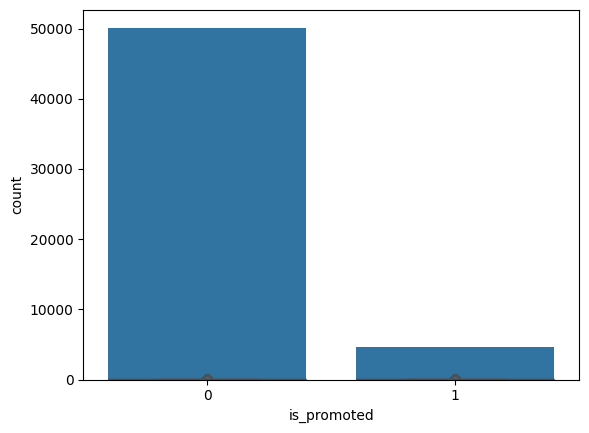

In [20]:
# Check for missing values
print(train.isnull().sum())

# Target distribution
sns.countplot(x='is_promoted', data=train)

# Age vs promotion
sns.boxplot(x='is_promoted', y='age', data=train)




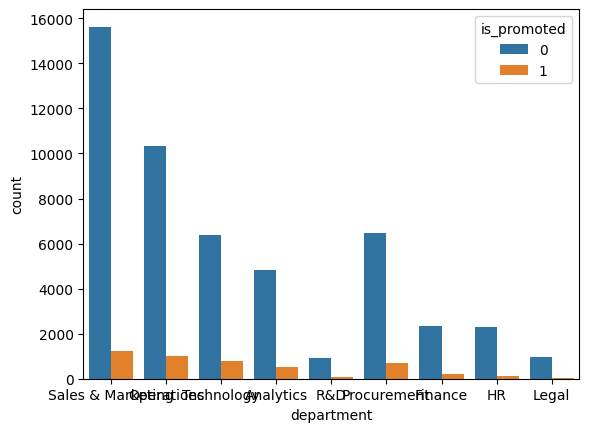

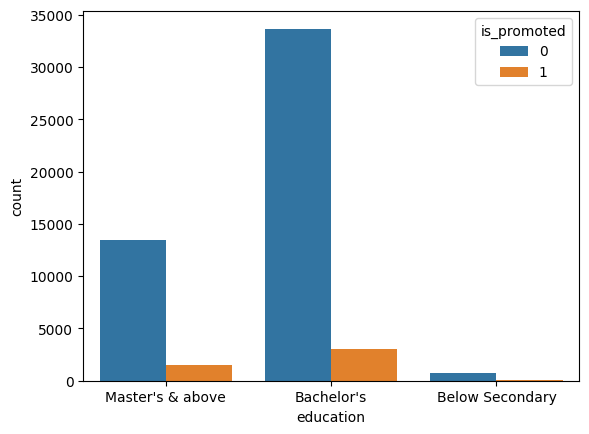

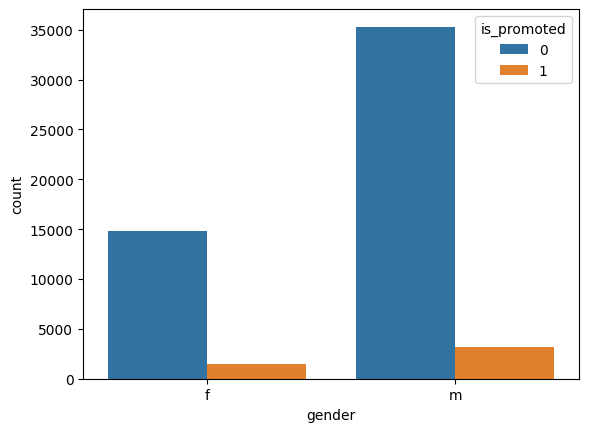

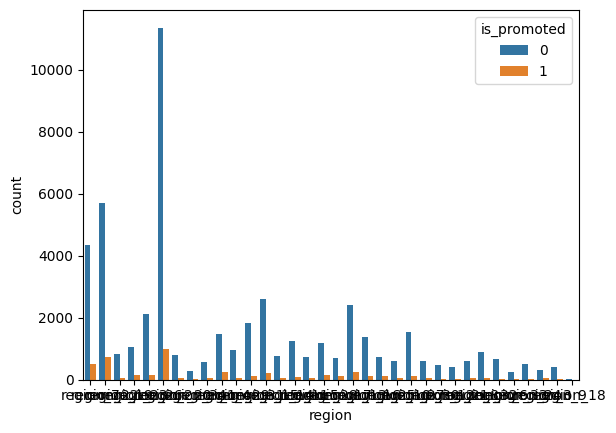

In [21]:
# Categorical distribution
for col in ['department', 'education', 'gender', 'region']:
    plt.figure()
    sns.countplot(x=col, hue='is_promoted', data=train)

---
4.Preprocessing

---

In [22]:
# Fill missing values
train['education'].fillna(train['education'].mode()[0], inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)

test['education'].fillna(test['education'].mode()[0], inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)


<ipython-input-22-7c8f5a43865e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna(train['education'].mode()[0], inplace=True)
<ipython-input-22-7c8f5a43865e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [23]:
# Label Encoding
cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [24]:
print(train.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


---
5.Modelling

---

In [25]:
X = train.drop(['employee_id', 'is_promoted'], axis=1)
y = train['is_promoted']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Train baseline model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)

# Evaluation
print("F1 Score:", f1_score(y_valid, y_pred))

F1 Score: 0.29945305378304465


---
6.Fine tuning with GridSearch

---

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='f1', cv=3)
grid.fit(X, y)
best_model = grid.best_estimator_


---
7.Prediction

---

In [33]:
test_features = test.drop(['employee_id'], axis=1)
test_pred = best_model.predict(test_features)

sample_submission['is_promoted'] = test_pred
sample_submission.to_csv('final_submission_with_logistic_Regression.csv', index=False)
